In [2]:
import pandas as pd
breast_all=pd.read_csv('breast_all.csv')
breast_all.set_index('Mixture',inplace=True)
breast_all.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
Mixture,,,,,,,,,,,,,,,,,,,,,
MB-0362,0.015478,0.003951,0.007837,0.026898,0.041058,0.019268,0.000000,0.071527,0.000000,0.025755,...,0.024800,0.004264,0.043432,0.226657,0.007362,0.001886,0.322251,0.075252,0.0,0.010263
MB-0346,0.000000,0.025933,0.018207,0.010389,0.000000,0.027239,0.036495,0.079323,0.001771,0.012534,...,0.000000,0.310585,0.075681,0.245238,0.000000,0.012609,0.078804,0.001065,0.0,0.010530
MB-0386,0.042462,0.000000,0.002564,0.045778,0.000000,0.015219,0.000000,0.077731,0.014036,0.056260,...,0.004822,0.203715,0.065862,0.285803,0.000000,0.000000,0.073755,0.063184,0.0,0.004066
MB-0574,0.014719,0.019382,0.000000,0.046340,0.000000,0.033331,0.000000,0.045819,0.019186,0.028543,...,0.003280,0.253064,0.063020,0.276691,0.000000,0.000000,0.163712,0.014725,0.0,0.000000
MB-0503,0.013848,0.022835,0.014552,0.040858,0.000000,0.036635,0.000000,0.066771,0.000000,0.060788,...,0.019244,0.139257,0.087535,0.140448,0.000000,0.000000,0.240200,0.085828,0.0,0.000000


In [3]:
#K-Mean Clustering
from scipy.optimize import minimize
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,12) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(breast_all) 
    kmeanModel.fit(breast_all)     
      
    distortions.append(sum(np.min(cdist(breast_all, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / breast_all.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(breast_all, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / breast_all.shape[0] 
          
    mapping2[k] = kmeanModel.inertia_ 

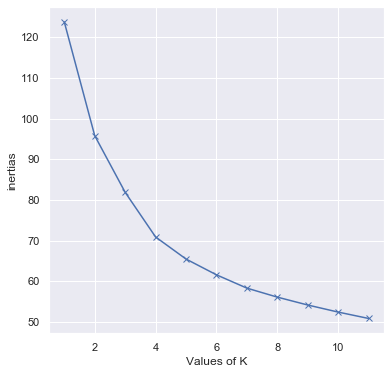

In [4]:
#Elbow method
sns.set(rc={'figure.figsize':(6,6)})
plt.figure
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('inertias') 
#plt.title('The Elbow Method using Distortion') 
#plt.savefig('Elbow_breast_all.eps', format='eps',bbox_inches='tight', dpi=1000)

plt.show()


In [5]:
#decide number of cluster =5 depens on elbow curve
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(breast_all)
#add cluster column 
breast_all['Clusters'] = y

breast_all=breast_all.sort_values(by=['Clusters'])
breast_all.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,Clusters
Mixture,,,,,,,,,,,,,,,,,,,,,
MB-0362,0.015478,0.003951,0.007837,0.026898,0.041058,0.019268,0.000000,0.071527,0.000000,0.025755,...,0.004264,0.043432,0.226657,0.007362,0.001886,0.322251,0.075252,0.0,0.010263,0
MB-5161,0.015916,0.000000,0.108518,0.000000,0.016817,0.129536,0.000000,0.048477,0.000000,0.062807,...,0.101083,0.081242,0.156305,0.012234,0.000000,0.205723,0.000000,0.0,0.000000,0
TCGA-A2-A259-01,0.108775,0.005316,0.000346,0.011897,0.000000,0.176319,0.015118,0.015706,0.039494,0.000000,...,0.055912,0.047040,0.128468,0.003621,0.041308,0.253745,0.000000,0.0,0.004338,0
MB-6204,0.031955,0.011639,0.009602,0.073465,0.000000,0.072590,0.002371,0.067943,0.006635,0.042803,...,0.046176,0.123374,0.160442,0.032492,0.010645,0.219915,0.000000,0.0,0.000000,0
MB-5143,0.037860,0.000000,0.002340,0.046423,0.073023,0.044737,0.000000,0.053590,0.003910,0.000000,...,0.131529,0.114349,0.191145,0.000000,0.000000,0.191727,0.000000,0.0,0.000000,0


In [6]:
#read data with the same clusters used in the paper 
#This data is also generated with the same method above. In case of cluster order change, 
#we used the order generated in the paper to show how to obtain Figure.
breast_all = pd.read_csv('Cells_cluster_allpatients.csv')
breast_all.set_index('Mixture', inplace=True)
breast_all.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,Clusters
Mixture,,,,,,,,,,,,,,,,,,,,,
TCGA-UU-A93S-01,0.048640,0.000000,0.059709,0.014494,0.0,0.016852,0.00000,0.139061,0.024382,0.000000,...,0.309352,0.036394,0.202878,0.000000,0.016052,0.051783,0.000000,0.000000,0.001748,0
TCGA-E9-A1N6-01,0.022411,0.000000,0.028556,0.002904,0.0,0.133782,0.00000,0.064145,0.017324,0.000000,...,0.321921,0.042642,0.304424,0.000000,0.008798,0.021304,0.010926,0.000000,0.001103,0
TCGA-A1-A0SP-01,0.060632,0.000000,0.041495,0.003579,0.0,0.143068,0.00000,0.061029,0.047027,0.000000,...,0.288744,0.041625,0.157670,0.045084,0.022298,0.021759,0.000000,0.008531,0.004049,0
MB-4127,0.004729,0.033260,0.000000,0.000000,0.0,0.050323,0.05312,0.068634,0.035002,0.010154,...,0.311136,0.078656,0.175286,0.014195,0.000000,0.009947,0.041590,0.021713,0.001680,0
MB-5058,0.030947,0.006422,0.000000,0.061530,0.0,0.000000,0.00000,0.074680,0.031758,0.105954,...,0.360790,0.087754,0.150527,0.000000,0.000000,0.029777,0.009297,0.000000,0.000000,0


In [7]:

df_mean = breast_all.groupby('Clusters').mean().reset_index()
df_mean

,Clusters,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
0,0,0.033272,0.005409,0.019849,0.027740,0.004360,0.058688,0.004102,0.070616,0.035048,...,0.007755,0.320080,0.069563,0.190373,0.001912,0.006263,0.069272,0.012917,0.001677,0.001796
1,1,0.067789,0.008157,0.037835,0.064589,0.002395,0.165744,0.008867,0.076999,0.029570,...,0.016862,0.103163,0.080195,0.199968,0.006658,0.008987,0.071906,0.005659,0.000778,0.001448
2,2,0.046848,0.004621,0.027711,0.032138,0.002856,0.082583,0.001527,0.068772,0.025256,...,0.023385,0.129137,0.054945,0.327328,0.007579,0.005894,0.083747,0.017896,0.003697,0.004083
3,3,0.029143,0.007240,0.039320,0.082150,0.012433,0.045655,0.017020,0.080108,0.027451,...,0.019862,0.145341,0.120014,0.143841,0.009866,0.006340,0.094510,0.007767,0.001322,0.001323
4,4,0.020233,0.009682,0.022923,0.050324,0.004044,0.084589,0.003630,0.058877,0.012548,...,0.026108,0.082178,0.076941,0.171959,0.012481,0.003918,0.265386,0.007948,0.000395,0.001812


<function matplotlib.pyplot.show(*args, **kw)>

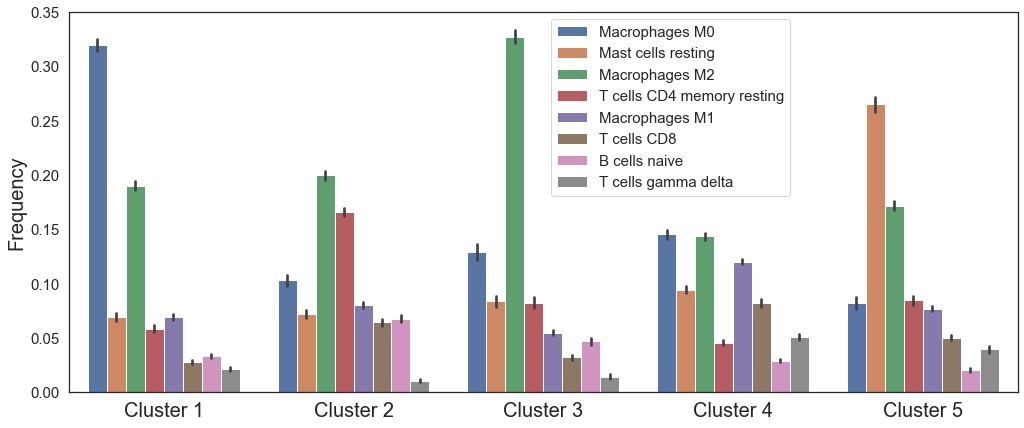

In [8]:
# Calculate variables with largest differences (by standard deviation)
# The higher the standard deviation in a variable based on average values for each cluster
# The more likely that the variable is important when creating the cluster
#sns.set(font_scale = 5)
sns.set(style="white")

results = pd.DataFrame(columns=['Variable', 'Std'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.std(df_mean[column])]
selected_columns = list(results.sort_values('Std', ascending=False).head(8).Variable.values) + ['Clusters']

# Plot data

tidy = breast_all[selected_columns].melt(id_vars='Clusters')
fig, ax = plt.subplots(figsize=(17, 7))
sns.barplot(x='Clusters', y='value', hue='variable',data=tidy)
plt.legend(loc='best',fontsize=15,bbox_to_anchor=(0.5,1))


plt.xlabel('')
plt.ylabel('Frequency',size=20)
plt.yticks(size=15)
plt.xticks([0,1,2,3,4],['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'],size=20)

#plt.title('Breast_all',size=15)
plt.show

#plt.savefig("breast_all_clusters.eps",format='eps',bbox_inches='tight', dpi=1000)
